In [ ]:
## CHA-AIPH Project
# -*- coding: utf-8 -*-

"""
Created on Tue Jan 20 2021
@author: Tisseaux Antoine

This script is resume performance for predicting survival at hospital discharge for ICU patients
"""

'\nCreated on Tue Jan 20 2021\n@author: Tisseaux Antoine\n\nThis script is resume performance for predicting survival at hospital discharge for ICU patients\n'

# set environement

Importing packages

In [ ]:
# Importing libraries:

from joblib import dump, load
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report
from sklearn import metrics

Importing files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



loading csv files

In [ ]:
my_df_all_patients = pd.read_csv('/content/drive/MyDrive/CHAIPH_PROJECT_GR2/project_submission_file_CHA_AIPH_Group1/data/final_dataframes/my_df_survival_preprocess.csv', sep=",")

setting a random seed:

In [ ]:
# setting random seed
SEED = 25

# Creating train and test datasets:

In [ ]:
# creating a vector y with the outcome:
y = my_df_all_patients["hospital_death"]

# creating a dataset X with the variables used for the prediction
X = my_df_all_patients.drop('hospital_death', axis=1)

## splitting the data into train set and test set:

80% for training, 20% for testing : (test_size = 0.2)

we stratify on outcome

In [ ]:
# splitting scaled data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)

##importing all models

In [ ]:
rnd_clf = load('/content/drive/MyDrive/CHAIPH_PROJECT_GR2/scripts/models/survival_prediction_models/rnd_no_oversamp.joblib')
log_clf = load('/content/drive/MyDrive/CHAIPH_PROJECT_GR2/scripts/models/survival_prediction_models/log.joblib')
ada_clf = load('/content/drive/MyDrive/CHAIPH_PROJECT_GR2/scripts/models/survival_prediction_models/ada.joblib')
svm_clf = load('/content/drive/MyDrive/CHAIPH_PROJECT_GR2/scripts/models/survival_prediction_models/svm.joblib')
with open('/content/drive/MyDrive/CHAIPH_PROJECT_GR2/scripts/models/survival_prediction_models/xgb.pkl', 'rb') as f:
    xgb_clf = pkl.load(f)
mlp_clf = keras.models.load_model('/content/drive/MyDrive/CHAIPH_PROJECT_GR2/scripts/models/survival_prediction_models')

## making prediction

In [ ]:
rnd_pos_probs = rnd_clf.predict_proba(X_test)[:, 1]
log_pos_probs = log_clf.predict_proba(X_test)[:, 1]
ada_pos_probs = ada_clf.predict_proba(X_test)[:, 1]
xgb_pos_probs = xgb_clf.predict_proba(X_test)[:, 1]
svm_y_pred = svm_clf.decision_function(X_test)
mlp_y_pred = mlp_clf.predict(X_test)

# Performance evaluation:

## ROC curve

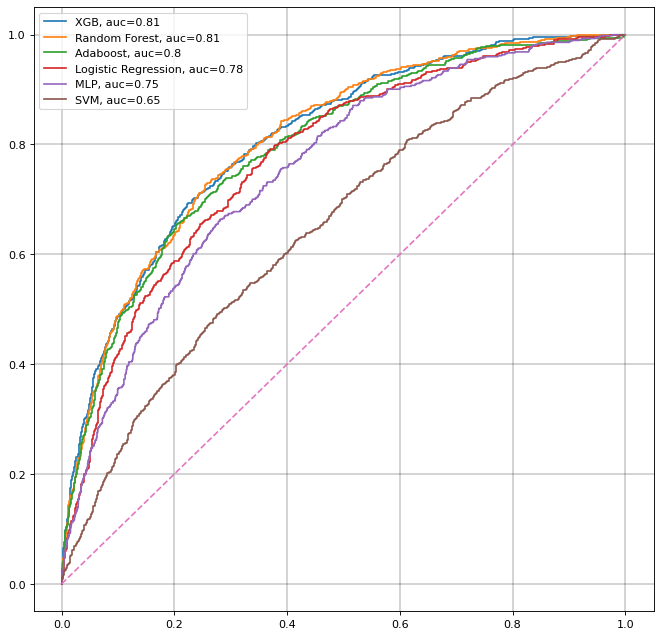

In [ ]:
# displaying ROC curve:
plt.figure(0, figsize=(10, 10), dpi=80).clf()

fpr, tpr, thresholds = metrics.roc_curve(y_test, xgb_pos_probs)
roc_auc = round(metrics.auc(fpr, tpr), 2)
plt.plot(fpr,tpr,label="XGB, auc="+str(roc_auc))

fpr, tpr, thresholds = metrics.roc_curve(y_test, rnd_pos_probs)
roc_auc = round(metrics.auc(fpr, tpr), 2)
plt.plot(fpr,tpr,label="Random Forest, auc="+str(roc_auc))

fpr, tpr, thresholds = metrics.roc_curve(y_test, ada_pos_probs)
roc_auc = round(metrics.auc(fpr, tpr), 2)
plt.plot(fpr,tpr,label="Adaboost, auc="+str(roc_auc))

fpr, tpr, thresholds = metrics.roc_curve(y_test, log_pos_probs)
roc_auc = round(metrics.auc(fpr, tpr), 2)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(roc_auc))


fpr, tpr, thresholds = metrics.roc_curve(y_test, mlp_y_pred)
roc_auc = round(metrics.auc(fpr, tpr), 2)
plt.plot(fpr,tpr,label="MLP, auc="+str(roc_auc))

fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_y_pred)
roc_auc = round(metrics.auc(fpr, tpr), 2)
plt.plot(fpr,tpr,label="SVM, auc="+str(roc_auc))

plt.plot([0, 1], [0, 1],'--')

plt.grid(color='black', linestyle='-', linewidth=0.3)

plt.legend(loc=0)